## K Medias

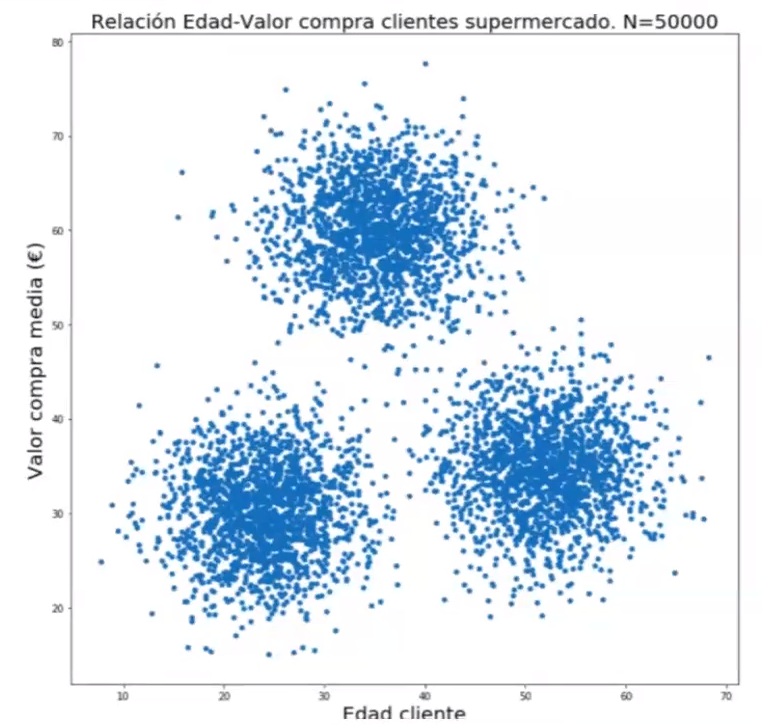

1. Elegir K
2. Asginar K centroides al azar
3. Asignar cada observación al cluster más cercano.
# $$ \sqrt{ \sum_{i=1}^{n}\|x_i-y_i\|^2  }$$
4. Calcular la inercia
# $$  \sum_{i=0}^{n} min(\|x_j - u_i \|^2)     ,  u_j \epsilon C$$
5. calcular nuevos centroides
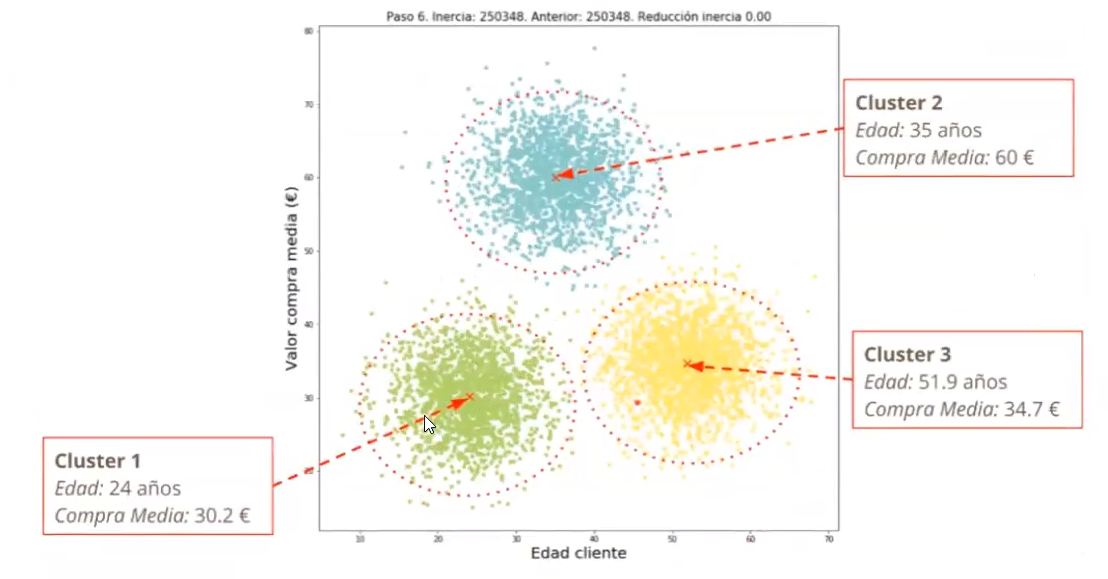

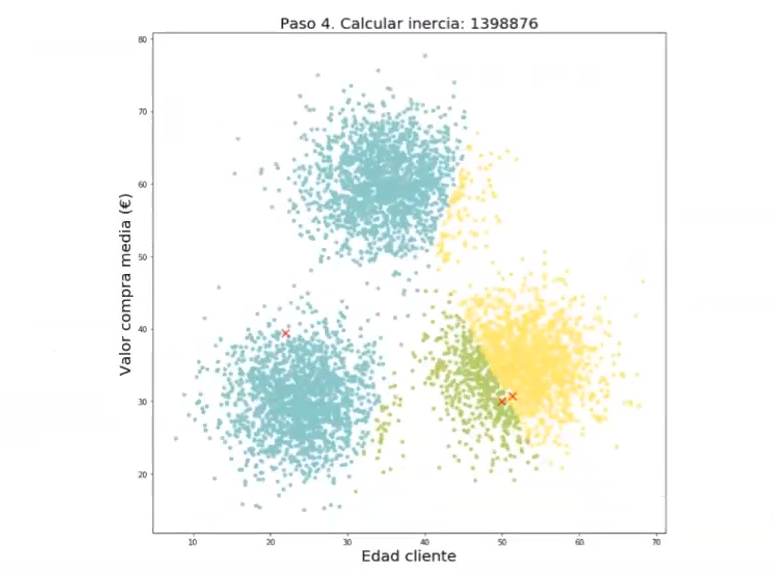

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize']=[10,10]
np.random.seed(42)

# Importamos datos

In [3]:
vehiculos = pd.read_csv('D:/Data Science Machine Learning & Deep Learning con Python/dataset/vehiculos_procesado.csv').drop(
    ['fabricante','modelo','transmision','traccion','clase','combustible','consumo'],
    axis=1
)

In [4]:
vehiculos.head(3)

,anio,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,tipo_combustible,tamanio_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla,consumo_std,desplazamiento_std
0,1984,2.5,4.0,522.764706,Vehiculos especiales,dos,Automatica,Normal,pequenio,alto,alto,0.222671,-0.589491,-0.604065
1,1984,4.2,6.0,683.615385,Vehiculos especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185,-1.372330,0.645817
2,1985,2.5,4.0,555.437500,Vehiculos especiales,dos,Automatica,Normal,pequenio,alto,alto,0.236588,-0.785201,-0.604065


In [5]:
vehiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   anio                  36791 non-null  int64  
 1   desplazamiento        36791 non-null  float64
 2   cilindros             36791 non-null  float64
 3   co2                   36791 non-null  float64
 4   clase_tipo            36791 non-null  object 
 5   traccion_tipo         36791 non-null  object 
 6   transmision_tipo      36791 non-null  object 
 7   tipo_combustible      36791 non-null  object 
 8   tamanio_motor_tipo    36789 non-null  object 
 9   consumo_tipo          36791 non-null  object 
 10  co2_tipo              36791 non-null  object 
 11  consumo_litros_milla  36791 non-null  float64
 12  consumo_std           36791 non-null  float64
 13  desplazamiento_std    36791 non-null  float64
dtypes: float64(6), int64(1), object(7)
memory usage: 3.9+ MB


In [23]:
datos_numericos=vehiculos.select_dtypes([int,float])
datos_categoricos=vehiculos.select_dtypes([object,'category'])

In [24]:
datos_numericos.head(3)

,anio,desplazamiento,cilindros,co2,consumo_litros_milla,consumo_std,desplazamiento_std
0,1984,2.5,4.0,522.764706,0.222671,-0.589491,-0.604065
1,1984,4.2,6.0,683.615385,0.291185,-1.372330,0.645817
2,1985,2.5,4.0,555.437500,0.236588,-0.785201,-0.604065


In [25]:
datos_categoricos.head(3)

,clase_tipo,traccion_tipo,transmision_tipo,tipo_combustible,tamanio_motor_tipo,consumo_tipo,co2_tipo
0,Vehiculos especiales,dos,Automatica,Normal,pequenio,alto,alto
1,Vehiculos especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehiculos especiales,dos,Automatica,Normal,pequenio,alto,alto


In [26]:
for col in datos_numericos.columns:
    datos_numericos[col].fillna(datos_numericos[col].mean(),inplace=True)

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
datos_numericos_normalizado=MinMaxScaler().fit_transform(datos_numericos)
datos_numericos_normalizado=pd.DataFrame(datos_numericos_normalizado,columns=datos_numericos.columns)

In [30]:
datos_numericos_normalizado.head(3)

,anio,desplazamiento,cilindros,co2,consumo_litros_milla,consumo_std,desplazamiento_std
0,0.000000,0.297619,0.250,0.398014,0.331027,0.196078,0.297619
1,0.000000,0.500000,0.375,0.527672,0.475113,0.117647,0.500000
2,0.029412,0.297619,0.250,0.424351,0.360294,0.176471,0.297619


In [33]:
datos_categoricos_codificados=pd.get_dummies(datos_categoricos,drop_first=True)

In [34]:
datos_categoricos_codificados.head(3)

,clase_tipo_Carros familiares,clase_tipo_Carros grandes,clase_tipo_Carros medianos,clase_tipo_Carros_pequenios,clase_tipo_Deportivos,clase_tipo_Furgonetas,clase_tipo_Vehiculos especiales,traccion_tipo_dos,transmision_tipo_Manual,tipo_combustible_Normal,...,tamanio_motor_tipo_muy pequenio,tamanio_motor_tipo_pequenio,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0


In [35]:
vehiculos_procesado=pd.concat([datos_numericos_normalizado,datos_categoricos_codificados],axis=1)

In [36]:
vehiculos_procesado.shape

(36791, 31)

In [37]:
vehiculos_procesado.head(3)

,anio,desplazamiento,cilindros,co2,consumo_litros_milla,consumo_std,desplazamiento_std,clase_tipo_Carros familiares,clase_tipo_Carros grandes,clase_tipo_Carros medianos,...,tamanio_motor_tipo_muy pequenio,tamanio_motor_tipo_pequenio,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.297619,0.250,0.398014,0.331027,0.196078,0.297619,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.000000,0.500000,0.375,0.527672,0.475113,0.117647,0.500000,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0.029412,0.297619,0.250,0.424351,0.360294,0.176471,0.297619,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## K-Medias

In [111]:
from sklearn.cluster import KMeans

In [112]:
estimador_kmedias=KMeans(random_state=42,n_clusters=8) # n_cluster equivale a K

In [113]:
estimador_kmedias.fit(vehiculos_procesado)

KMeans(random_state=42)

In [114]:
clusters=estimador_kmedias.labels_
clusters

array([0, 3, 0, ..., 2, 2, 2])

In [116]:
centroides.shape

(8, 31)

In [117]:
estimador_kmedias.inertia_

66673.78534294706

In [53]:
centroides=estimador_kmedias.cluster_centers_
centroides

array([[ 4.45112389e-01,  4.60430513e-01,  3.87725431e-01,
         4.04535467e-01,  3.37078291e-01,  1.94233470e-01,
         4.60430513e-01,  2.53528489e-02,  3.71144799e-02,
         4.70465238e-02,  3.94668061e-02,  2.72085729e-01,
         1.02195504e-01,  1.35389441e-01,  5.51228437e-01,
         2.69210664e-01,  8.57814950e-01,  4.33873497e-02,
         9.74908521e-02,  2.77051751e-01,  1.28593832e-01,
         8.62519603e-03,  5.72399373e-02,  2.66596968e-02,
         2.19550444e-02, -9.15933995e-16,  2.43073706e-02,
         1.25457397e-02,  3.24098275e-02,  3.13643492e-03,
         8.62519603e-03],
       [ 5.95855291e-01,  6.52455898e-01,  5.41313559e-01,
         4.83109101e-01,  4.18247029e-01,  1.50132935e-01,
         6.52455898e-01,  1.02905569e-02,  8.38377724e-02,
         8.53510896e-02,  3.13256659e-01,  2.07929782e-01,
         8.47457627e-02,  3.63196126e-02,  6.34382567e-01,
         1.72518160e-01, -2.44249065e-15,  3.79237288e-01,
         6.20762712e-01,  4.20

##### Hiperparametros
- n_clusters
- init
- n_init
- max_iter
- tol

In [54]:
from sklearn.metrics import euclidean_distances

In [55]:
distancia_centroides=euclidean_distances(centroides)
distancia_centroides

array([[0.        , 1.72096434, 1.8569333 , 1.56851246, 1.88011293,
        1.95385565, 1.57906383, 1.44124776],
       [1.72096434, 0.        , 2.4856849 , 1.40104282, 2.01859671,
        2.02693645, 2.43448128, 2.32864056],
       [1.8569333 , 2.4856849 , 0.        , 2.51619841, 2.25274024,
        2.46405515, 2.09839228, 2.26415675],
       [1.56851246, 1.40104282, 2.51619841, 0.        , 2.61516073,
        2.63730109, 2.29438146, 2.1927828 ],
       [1.88011293, 2.01859671, 2.25274024, 2.61516073, 0.        ,
        1.83369466, 1.50371162, 2.34636793],
       [1.95385565, 2.02693645, 2.46405515, 2.63730109, 1.83369466,
        0.        , 2.4815606 , 1.45288832],
       [1.57906383, 2.43448128, 2.09839228, 2.29438146, 1.50371162,
        2.4815606 , 0.        , 2.04530979],
       [1.44124776, 2.32864056, 2.26415675, 2.1927828 , 2.34636793,
        1.45288832, 2.04530979, 0.        ]])

In [63]:
list(zip(np.argmax(distancia_centroides,axis=1),np.max(distancia_centroides,axis=1)))

[(5, 1.9538556464133463),
 (2, 2.4856848962801883),
 (3, 2.5161984063013403),
 (5, 2.6373010902794327),
 (3, 2.6151607268264443),
 (3, 2.6373010902794327),
 (5, 2.481560603232109),
 (4, 2.3463679277595917)]

In [64]:
def resumen_cluster(cluster_id):
    cluster=vehiculos[clusters==cluster_id]
    resumen_cluster=cluster[datos_categoricos.columns].mode().to_dict(orient='records')[0]
    resumen_cluster.update(cluster.mean().to_dict())
    resumen_cluster['cluster_id']=cluster_id
    return resumen_cluster

def comparar_clusters(*cluster_ids):
    resumenes=[]
    for cluster_id in cluster_ids:
        resumenes.append(resumen_cluster(cluster_id))
    return pd.DataFrame(resumenes).set_index('cluster_id').T

In [65]:
resumen_cluster(0)

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_13416\2128492439.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resumen_cluster.update(cluster.mean().to_dict())


{'clase_tipo': 'Camionetas',
 'traccion_tipo': 'dos',
 'transmision_tipo': 'Automatica',
 'tipo_combustible': 'Normal',
 'tamanio_motor_tipo': 'grande',
 'consumo_tipo': 'alto',
 'co2_tipo': 'alto',
 'anio': 1999.1338212232097,
 'desplazamiento': 3.8676163094615976,
 'cilindros': 6.203606900156822,
 'co2': 530.8551416374972,
 'consumo_litros_milla': 0.22554883302350898,
 'consumo_std': -0.6079060139314852,
 'desplazamiento_std': 0.4014403297156459,
 'cluster_id': 0}

In [66]:
comparar_clusters(0,5)

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_13416\2128492439.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resumen_cluster.update(cluster.mean().to_dict())
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_13416\2128492439.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resumen_cluster.update(cluster.mean().to_dict())


cluster_id,0,5
clase_tipo,Camionetas,Carros_pequenios
traccion_tipo,dos,dos
transmision_tipo,Automatica,Automatica
tipo_combustible,Normal,Premium
tamanio_motor_tipo,grande,mediano
consumo_tipo,alto,moderado
co2_tipo,alto,moderado
anio,1999.133821,2003.690599
desplazamiento,3.867616,3.425232
cilindros,6.203607,6.196798


In [67]:
comparar_clusters(*np.unique(clusters))

C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_13416\2128492439.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resumen_cluster.update(cluster.mean().to_dict())
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_13416\2128492439.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resumen_cluster.update(cluster.mean().to_dict())
C:\Users\WINDOWS\AppData\Local\Temp\ipykernel_13416\2128492439.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  resumen_cluster.update(cluster.mean().to_dict()

cluster_id,0,1,2,3,4,5,6,7
clase_tipo,Camionetas,Carros_pequenios,Carros_pequenios,Camionetas,Carros_pequenios,Carros_pequenios,Carros_pequenios,Carros_pequenios
traccion_tipo,dos,dos,dos,dos,dos,dos,dos,dos
transmision_tipo,Automatica,Automatica,Automatica,Automatica,Automatica,Automatica,Automatica,Automatica
tipo_combustible,Normal,Premium,Normal,Normal,Premium,Premium,Normal,Normal
tamanio_motor_tipo,grande,muy grande,muy pequenio,muy grande,mediano,mediano,pequenio,mediano
consumo_tipo,alto,muy alto,muy bajo,muy alto,bajo,moderado,bajo,moderado
co2_tipo,alto,muy alto,muy bajo,muy alto,bajo,moderado,bajo,moderado
anio,1999.133821,2004.25908,2003.335408,1994.644406,2007.254768,2003.690599,1999.335981,1997.824468
desplazamiento,3.867616,5.48063,1.915979,4.877863,2.918964,3.425232,2.456771,3.177344
cilindros,6.203607,8.661017,4.033419,7.373768,5.52213,6.196798,4.487292,5.589428


In [88]:
def kmeans_cluster(df,n_clusters=2):
    model=KMeans(n_clusters=n_clusters,random_state=42)
    clusters=model.fit_predict(df)
    clusters_results=df.copy()
    clusters_results['Cluster']=clusters
    return clusters_results

def resumen_grafico_clustering(results):
    cluster_size=results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns=['Cluster','Count']
    cluster_means=results.groupby(['Cluster'], as_index=False).mean()
    cluster_sumary=pd.merge(cluster_size,cluster_means,on='Cluster')
    cluster_sumary=cluster_sumary.drop(['Count'],axis=1).set_index('Cluster')
    return cluster_sumary[sorted(cluster_sumary.columns)]

In [89]:
clusters_results=kmeans_cluster(vehiculos_procesado,8)
cluster_sumary=resumen_grafico_clustering(clusters_results)

In [90]:
cluster_sumary

,anio,cilindros,clase_tipo_Carros familiares,clase_tipo_Carros grandes,clase_tipo_Carros medianos,clase_tipo_Carros_pequenios,clase_tipo_Deportivos,clase_tipo_Furgonetas,clase_tipo_Vehiculos especiales,co2,...,desplazamiento_std,tamanio_motor_tipo_mediano,tamanio_motor_tipo_muy grande,tamanio_motor_tipo_muy pequenio,tamanio_motor_tipo_pequenio,tipo_combustible_Normal,tipo_combustible_Otros tipos,tipo_combustible_Premium,traccion_tipo_dos,transmision_tipo_Manual
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.445112,0.387725,0.025353,0.037114,0.047047,0.039467,0.272086,0.102196,0.135389,0.404535,...,0.460431,0.277052,0.128594,0.008625,0.057240,0.857815,0.043387,0.097491,0.551228,0.269211
1,0.595855,0.541314,0.010291,0.083838,0.085351,0.313257,0.207930,0.084746,0.036320,0.483109,...,0.652456,0.042070,0.824455,0.000000,0.002119,0.000000,0.379237,0.620763,0.634383,0.172518
2,0.568688,0.252089,0.117846,0.017589,0.139223,0.629549,0.078474,0.001624,0.007712,0.241157,...,0.228093,0.026925,0.000000,0.754566,0.217968,0.762955,0.052632,0.176025,0.910702,0.486132
3,0.313071,0.460861,0.001971,0.016203,0.017955,0.031531,0.132253,0.233852,0.142763,0.507836,...,0.580698,0.079483,0.649880,0.000876,0.011605,1.000000,0.000000,0.000000,0.563171,0.264944
4,0.683964,0.345133,0.060453,0.037783,0.132422,0.695574,0.070529,0.000000,0.001439,0.319480,...,0.347496,0.429651,0.003958,0.204750,0.170565,0.000000,0.048579,0.951062,0.723642,0.387549
5,0.579135,0.387300,0.085486,0.083936,0.193182,0.560176,0.069473,0.000775,0.003616,0.354927,...,0.407766,0.386105,0.106921,0.051136,0.163740,0.000000,0.008264,0.991219,0.674329,0.273760
6,0.451058,0.280456,0.103654,0.048054,0.153296,0.357625,0.173352,0.010921,0.062351,0.304201,...,0.292473,0.156076,0.010127,0.311358,0.461676,0.965449,0.034551,0.000000,0.798451,0.354647
7,0.406602,0.349339,0.083278,0.090093,0.132979,0.186336,0.172706,0.066822,0.088930,0.354601,...,0.378255,0.441489,0.056848,0.049202,0.221077,0.952128,0.047872,0.000000,0.784076,0.253989


<AxesSubplot:xlabel='Cluster'>

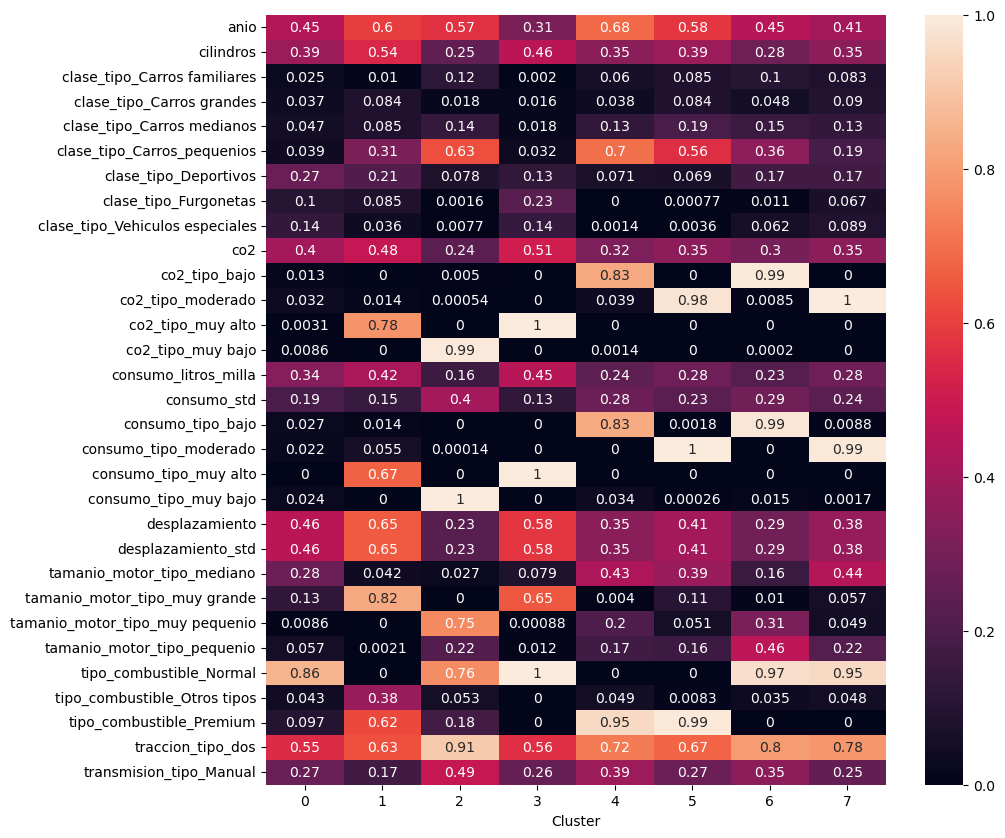

In [91]:
import seaborn as sns
sns.heatmap(cluster_sumary.transpose(),annot=True)

In [92]:
clusters_results

,anio,desplazamiento,cilindros,co2,consumo_litros_milla,consumo_std,desplazamiento_std,clase_tipo_Carros familiares,clase_tipo_Carros grandes,clase_tipo_Carros medianos,...,tamanio_motor_tipo_pequenio,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,Cluster
0,0.000000,0.297619,0.2500,0.398014,0.331027,0.196078,0.297619,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.000000,0.500000,0.3750,0.527672,0.475113,0.117647,0.500000,0,0,0,...,0,0,0,1,0,0,0,1,0,3
2,0.029412,0.297619,0.2500,0.424351,0.360294,0.176471,0.297619,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0.029412,0.500000,0.3750,0.527672,0.475113,0.117647,0.500000,0,0,0,...,0,0,0,1,0,0,0,1,0,3
4,0.088235,0.452381,0.3750,0.424351,0.360294,0.176471,0.452381,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.119048,0.1875,0.173307,0.083878,0.568627,0.119048,0,0,0,...,0,0,0,0,1,0,0,0,1,2
36787,0.941176,0.107143,0.1875,0.174919,0.090196,0.549020,0.107143,0,0,0,...,0,0,0,0,1,0,0,0,1,2
36788,0.941176,0.107143,0.1875,0.182174,0.096886,0.529412,0.107143,0,0,0,...,0,0,0,0,1,0,0,0,1,2
36789,0.970588,0.107143,0.1875,0.176532,0.090196,0.549020,0.107143,0,0,0,...,0,0,0,0,1,0,0,0,1,2


## ¿Cómo elegir K?
1. Conocimiento de dominio
2. Decisión de negocio
3. Método del codo

In [93]:
from scipy.spatial.distance import cdist
varianza_total = cdist(XA=vehiculos_procesado,XB=np.array([vehiculos_procesado.mean()]))
suma_varianza_total=varianza_total.sum()

In [94]:
varianza_total

array([[1.70398618],
       [1.8908617 ],
       [1.69835128],
       ...,
       [2.18598219],
       [2.11325048],
       [2.19206251]])

In [95]:
suma_varianza_total

70990.95668826079

In [105]:
def varianza_cluster(cluster_id,centroide_cluster,etiquetas_clusters):
    elementos_cluster=vehiculos_procesado[etiquetas_clusters==cluster_id]
    return cdist(XA=elementos_cluster,XB=np.array([centroide_cluster])).sum()

def medida_varianza(estimador_kmedias,suma_varianza_total):
    etiquetas_clusters=estimador_kmedias.labels_
    wss=0
    for i,cluster_id in enumerate(np.unique(etiquetas_clusters)):
        centroide_cluster=estimador_kmedias.cluster_centers_[i]
        wss+=varianza_cluster(cluster_id,centroide_cluster,etiquetas_clusters)
    return (suma_varianza_total-wss)/suma_varianza_total

In [106]:
def media_inercia(estimador_kmedias):
    return estimador_kmedias.inertia_

In [107]:
def evaluar_k_kmedias(k,medida,**kwargs):
    if medida=='inercia':
        funcion_medida=media_inercia
    elif medida=='varianza':
        funcion_medida=medida_varianza
    
    estimador_kmedias = KMeans(random_state=42,n_clusters=k)
    estimador_kmedias.fit(vehiculos_procesado)
    return funcion_medida(estimador_kmedias,**kwargs)

In [108]:
resultados_k={}
rango_k=[5,10,20,30,50,75,100,200,300]
for k in rango_k:
    resultados_k[k]=evaluar_k_kmedias(k,
                                      'inercia'),evaluar_k_kmedias(k,'varianza',
                                                                   suma_varianza_total = suma_varianza_total)

In [118]:
resultados_k

{5: (78029.57073080738, 0.261454030868184),
 10: (61682.99101856578, 0.3464935770650271),
 20: (47420.94174585033, 0.43554572755359805),
 30: (41691.49590318506, 0.4816193291547453),
 50: (32926.058591936606, 0.5509528797743615),
 75: (26222.787406101535, 0.6100360631792157),
 100: (21489.037888274914, 0.652433115662423),
 200: (12218.148406904369, 0.7612365553073627),
 300: (7924.763539976545, 0.8175915569056759)}

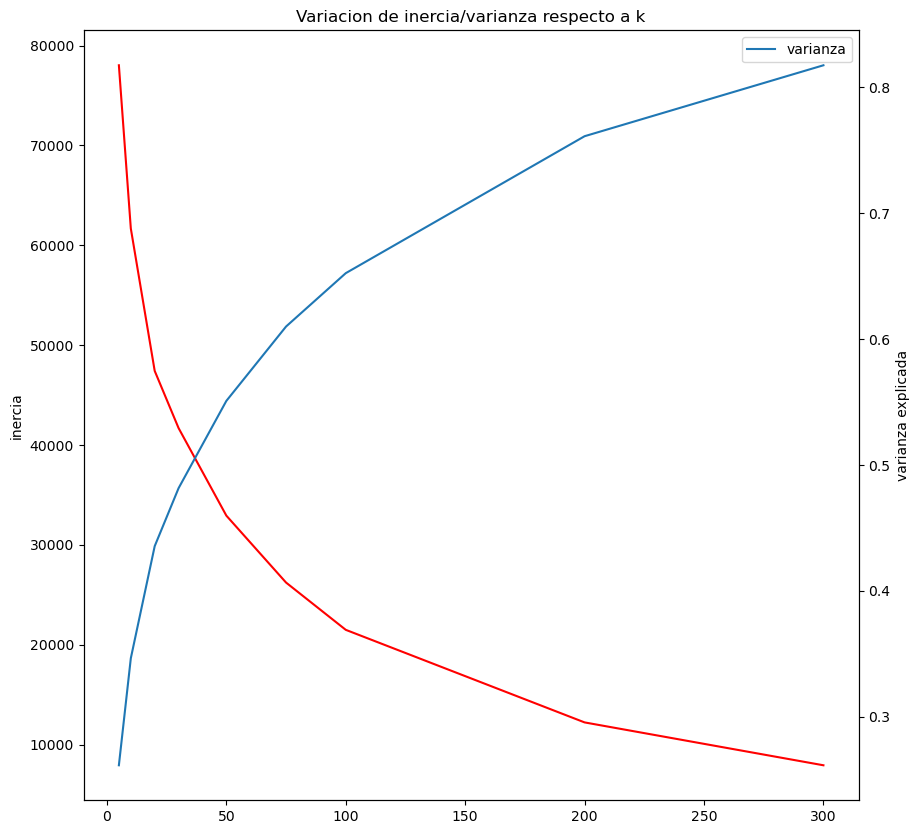

In [109]:
fig,ax1=plt.subplots()

ax1.plot(
    [c[0]for c in resultados_k.items()],
    [c[1][0]for c in resultados_k.items()],label='inercia',color='red'
)
ax1.set_ylabel('inercia')

ax2=ax1.twinx()
ax2.plot(
    [c[0]for c in resultados_k.items()],
    [c[1][1]for c in resultados_k.items()],label='varianza')
ax2.set_ylabel('varianza explicada')

plt.xlabel('k')
plt.legend()
plt.title('Variacion de inercia/varianza respecto a k');